<a href="https://colab.research.google.com/github/Aseel533/try/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading** **Data**

In [1]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('Processed_dataset.csv');
print(data)

      age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0       1    1   0         1  0.196347    0        1  0.740458      0   
1       1    1   0         1  0.175799    1        0  0.641221      1   
2       2    1   0         2  0.109589    0        1  0.412214      1   
3       2    1   0         2  0.175799    0        1  0.687023      0   
4       2    0   0         1  0.383562    1        1  0.267176      0   
...   ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020    1    1   1         1  0.216895    0        1  0.709924      1   
1021    1    1   0         1  0.301370    0        0  0.534351      1   
1022    1    1   0         0  0.340183    0        0  0.358779      1   
1023    1    0   0         0  0.292237    0        0  0.671756      0   
1024    1    1   0         0  0.141553    0        1  0.320611      0   

       oldpeak  slope  ca  thal  target  
0     0.161290      2   2     3       0  
1     0.500000      0   0     3       0

**Classification**

**Feature Selection**

chooses the variables (features) to be utilized in training, which are kept in the variable "X," as well as the variable from the dataset that has the right classifications (class labels), which is kept in the variable "y."

In [2]:
fn= data.keys().tolist()[:-1]
X= data[fn]
y=data['target']
print(X)

      age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0       1    1   0         1  0.196347    0        1  0.740458      0   
1       1    1   0         1  0.175799    1        0  0.641221      1   
2       2    1   0         2  0.109589    0        1  0.412214      1   
3       2    1   0         2  0.175799    0        1  0.687023      0   
4       2    0   0         1  0.383562    1        1  0.267176      0   
...   ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020    1    1   1         1  0.216895    0        1  0.709924      1   
1021    1    1   0         1  0.301370    0        0  0.534351      1   
1022    1    1   0         0  0.340183    0        0  0.358779      1   
1023    1    0   0         0  0.292237    0        0  0.671756      0   
1024    1    1   0         0  0.141553    0        1  0.320611      0   

       oldpeak  slope  ca  thal  
0     0.161290      2   2     3  
1     0.500000      0   0     3  
2     0.419355      0

**1.Information Gain (Entropy):**

Splitting Data into 70% Training and 30% Test:

In [3]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

Confusion matrix:

[[157   4]
 [  3 144]]
0(Not HeartDisease) 1(HeartDisease)


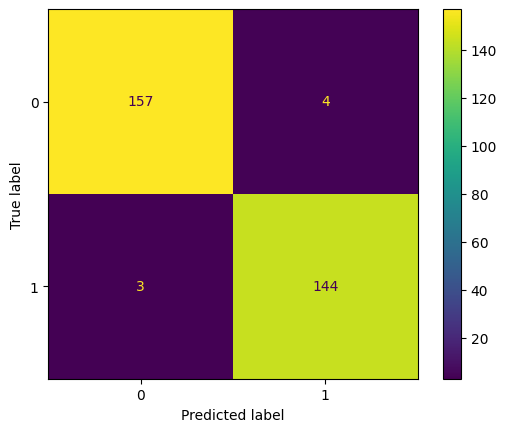

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm =cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
cn = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf , X_test , y_test , display_labels=cn)

print('0(Not HeartDisease) 1(HeartDisease)')

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:
* **Top-Left (TN)** = 157Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."
* **Top-Right (FN)** = 4Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."
* **Bottom-Left (FP**) = 3Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."
* **Bottom-Right (TP)** = 144Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight:
The model Correctly identified **157** cases of **Not HeartDisease** and **144** cases of **HeartDisease**.Incorrectly classified **4** cases of **Not HeartDisease as HeartDisease**.Incorrectly classified **3** cases of **HeartDisease as Not HeartDisease.**


Decision Tree:

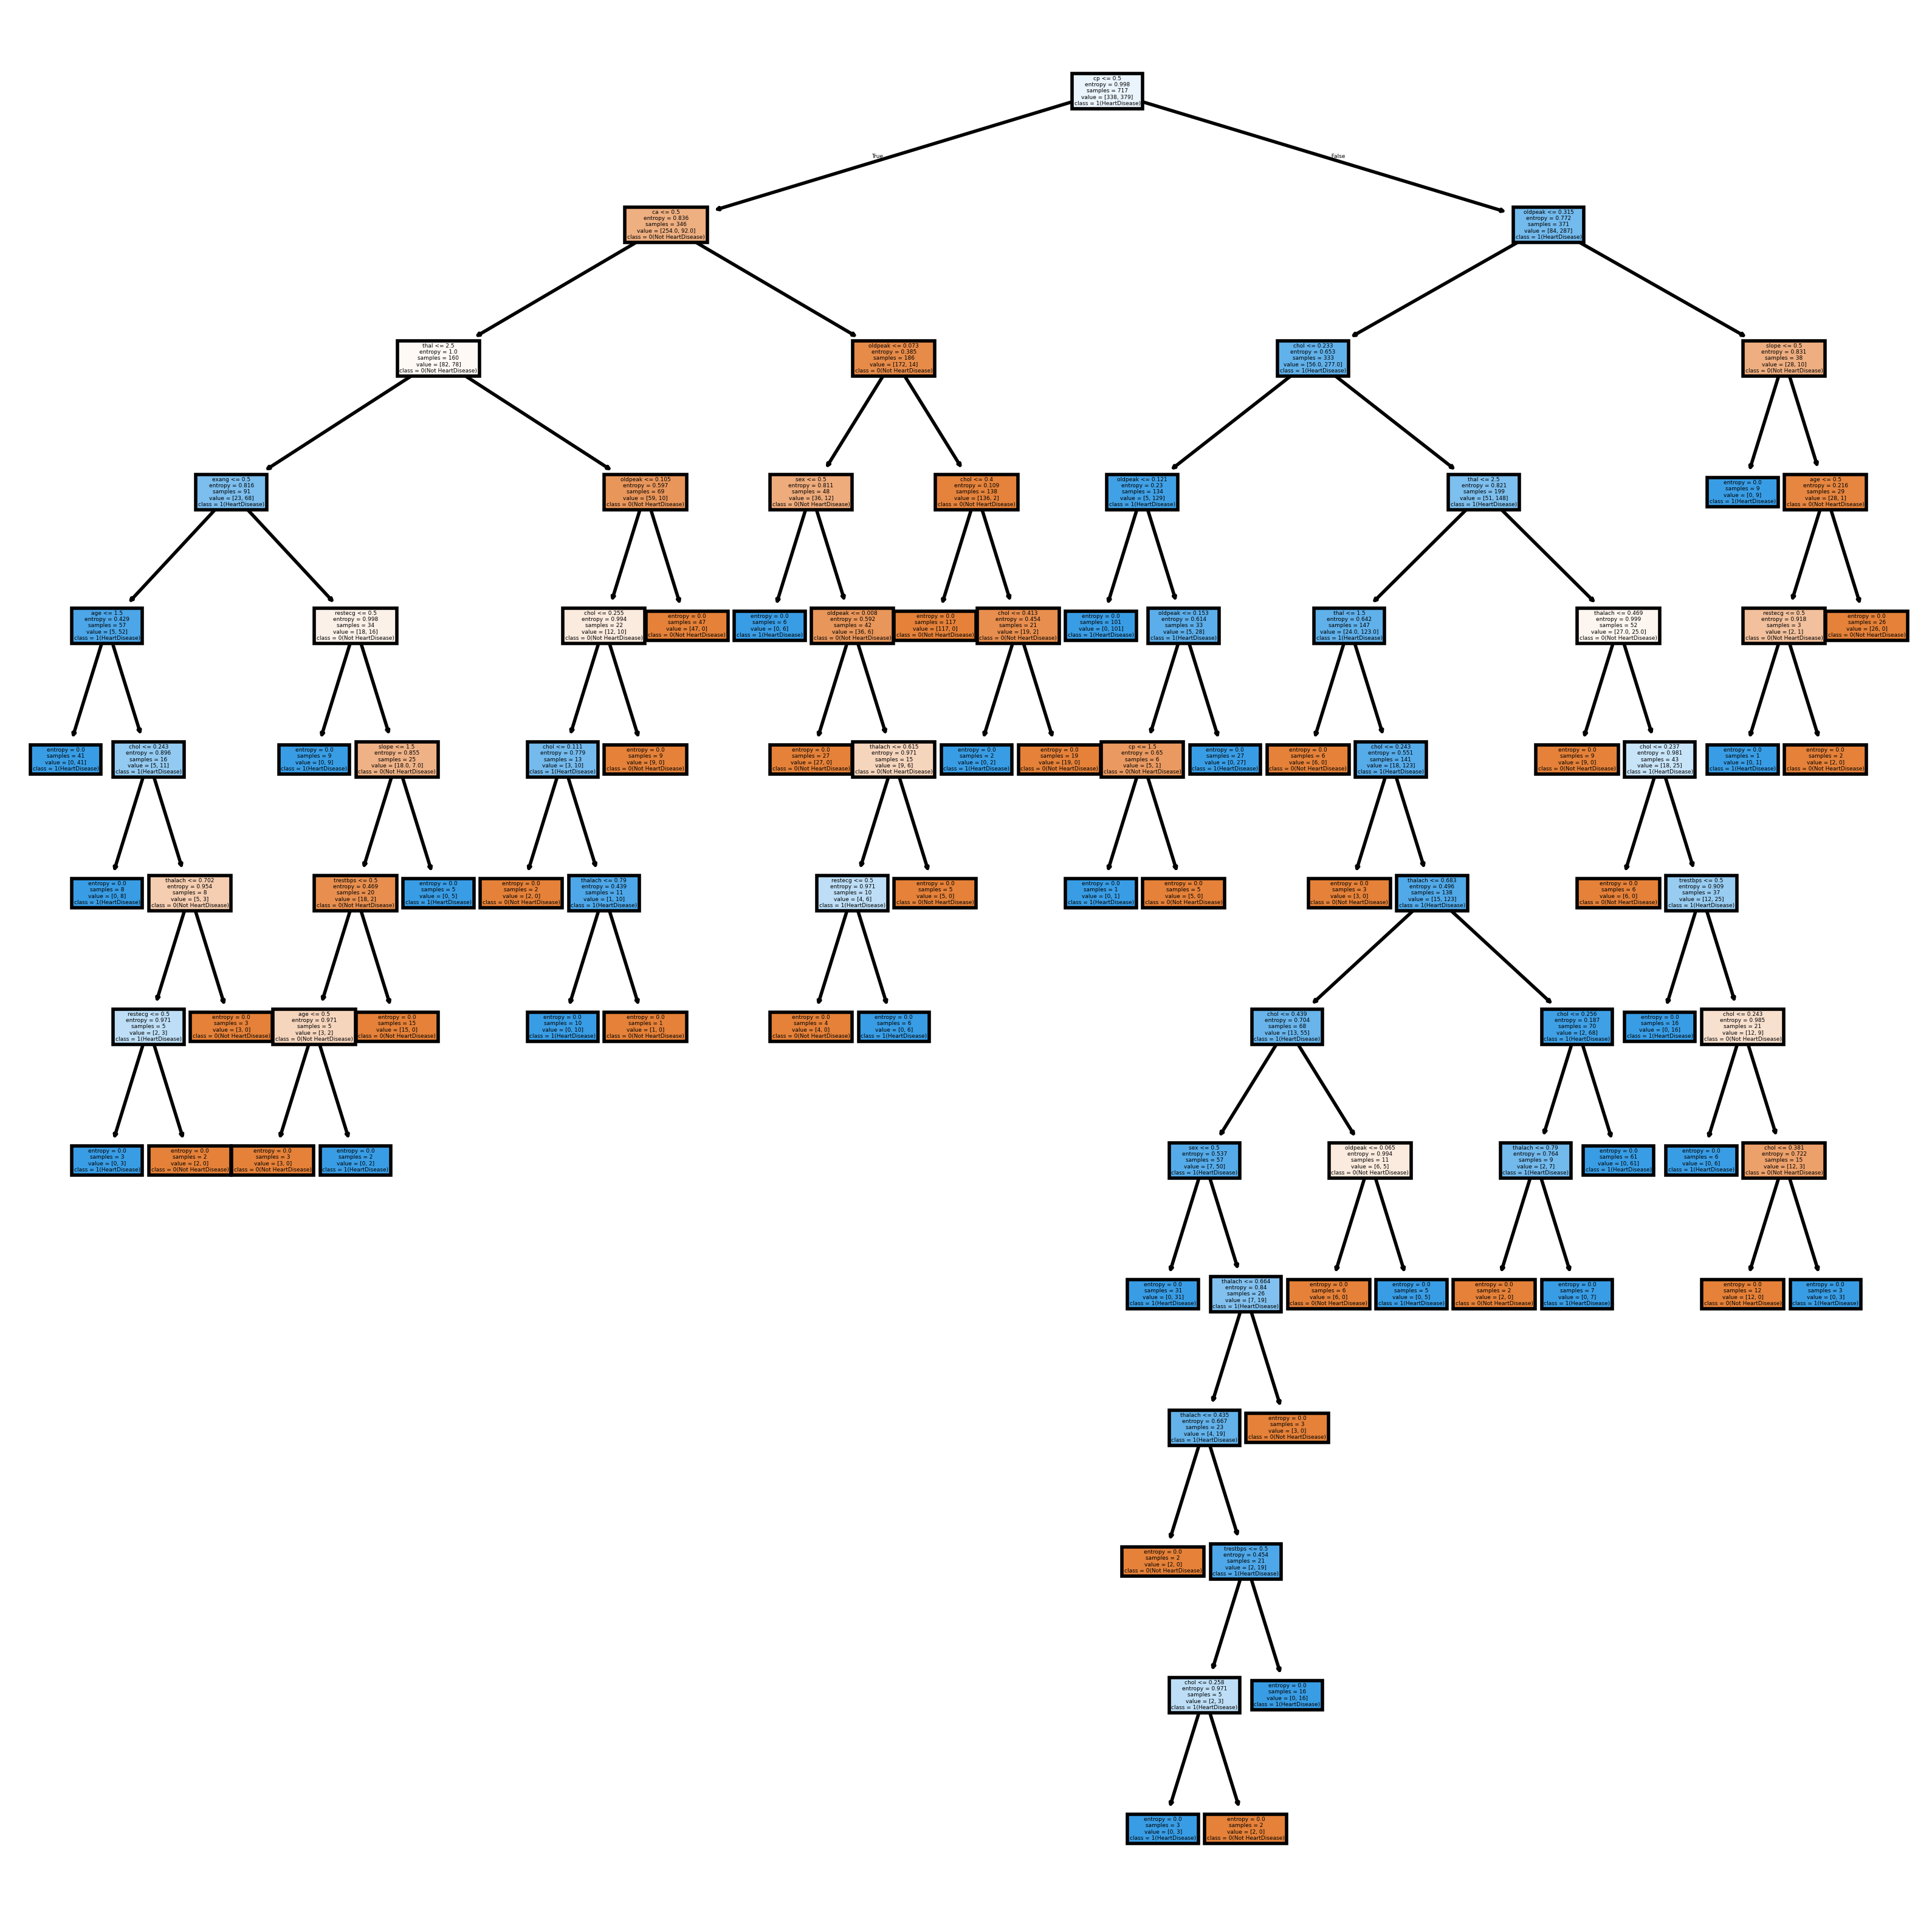

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

In [ ]:
fig.savefig("decision_tree.png", dpi=400)

 **Decision Tree Analysis**  

This decision tree displays a hierarchical classification process where nodes split based on selected attributes to optimize prediction accuracy. Each node represents a decision point that utilizes a feature from the dataset, chosen based on its ability to enhance separation between classes by reducing uncertainty (impurity).  

- **Initial Split:**  
  The root node at the top represents the feature with the highest discriminative power. This feature is selected to best divide the dataset, maximizing information gain or minimizing impurity. The root feature in this model plays a significant role in predicting whether a patient has heart disease or not.  

- **Intermediate Nodes:**  
  As we move down the tree, additional splits occur on various features, further partitioning the data into smaller subsets, leading to more refined classifications. Each split is determined by a threshold that optimizes the classification process. The features used at these levels likely include key medical indicators such as cholesterol levels, blood pressure, or age, which are crucial for heart disease diagnosis.  

- **Branching Pathways:**  
  Each pathway from a parent node to a child node represents a decision based on the feature at that node, effectively creating a path that defines a unique set of conditions. These pathways help in narrowing down the classification, ensuring that each sample follows a logical route based on its feature values.  

- **Leaf Nodes:**  
  At the end of each branch, a leaf node provides a final classification based on the conditions met along the path. These terminal nodes represent the final prediction: either **"Heart Disease"** or **"Not Heart Disease."** Each pathway to a leaf node corresponds to a unique combination of feature values, guiding the prediction based on the model's learned patterns.  

This tree structure helps visualize how different medical factors contribute to predicting heart disease, offering an interpretable way to understand the model’s decision-making process.  

**model evaluation and selection**

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[157   4]
 [  3 144]]
Accuracy: 0.9772727272727273
Error Rate: 0.022727272727272707
Sensitivity: 0.9795918367346939
Specificity: 0.9751552795031055
Precision: 0.972972972972973


### **Performance Metrics**
- **Accuracy:** This metric measures the proportion of correct predictions among all predictions. Here, the model's accuracy is approximately **97.73%**, meaning it correctly classifies about **97.73%** of instances.

- **Error Rate:** This represents the proportion of incorrect predictions out of all predictions. The error rate for this model is around **2.27%**.

- **Sensitivity (Recall):** This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately **97.96%**.

- **Specificity:** This measures the proportion of actual negative cases (no heart disease) that the model correctly identifies, which is around **97.52%**.

- **Precision:** This reflects the proportion of positive predictions that are actually correct. Here, the precision is about **97.30%**.



### **Outcomes:**
- The model's **accuracy of 97.73%** demonstrates a high level of correct predictions overall.
- The **sensitivity (97.96%)** indicates that the model has an excellent ability to identify cases of heart disease.
- **Specificity, at 97.52%,** reflects the model’s competence in correctly classifying negative cases (no heart disease).
- **Precision at 97.30%** highlights the accuracy of positive predictions, suggesting that most positive predictions made by the model are correct.


Splitting Data into 60% Training and 40% Test:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

Confusion matrix:

[[205   8]
 [  9 188]]
0(Not HeartDisease) 1(HeartDisease)


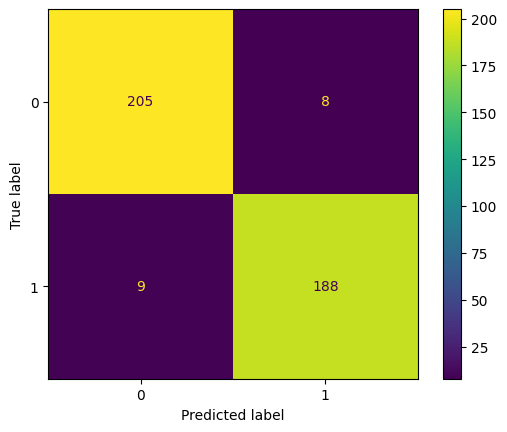

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

from sklearn.metrics import ConfusionMatrixDisplay
cn2 = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf2 , X_test , y_test , display_labels=cn2)

print('0(Not HeartDisease) 1(HeartDisease)')

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

**Top-Left (TN)** = 205 Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."

**Top-Right (FP)** = 8 Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."

**Bottom-Left (FN)** = 9 Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."

**Bottom-Right (TP)** = 188 Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight:
The model
* Correctly identified 188 cases of HeartDisease and 205 cases of Not HeartDisease.
* Incorrectly classified 9 cases of HeartDisease as Not HeartDisease.
* Incorrectly classified 8 cases of Not HeartDisease as HeartDisease.

Dessicion Tree:

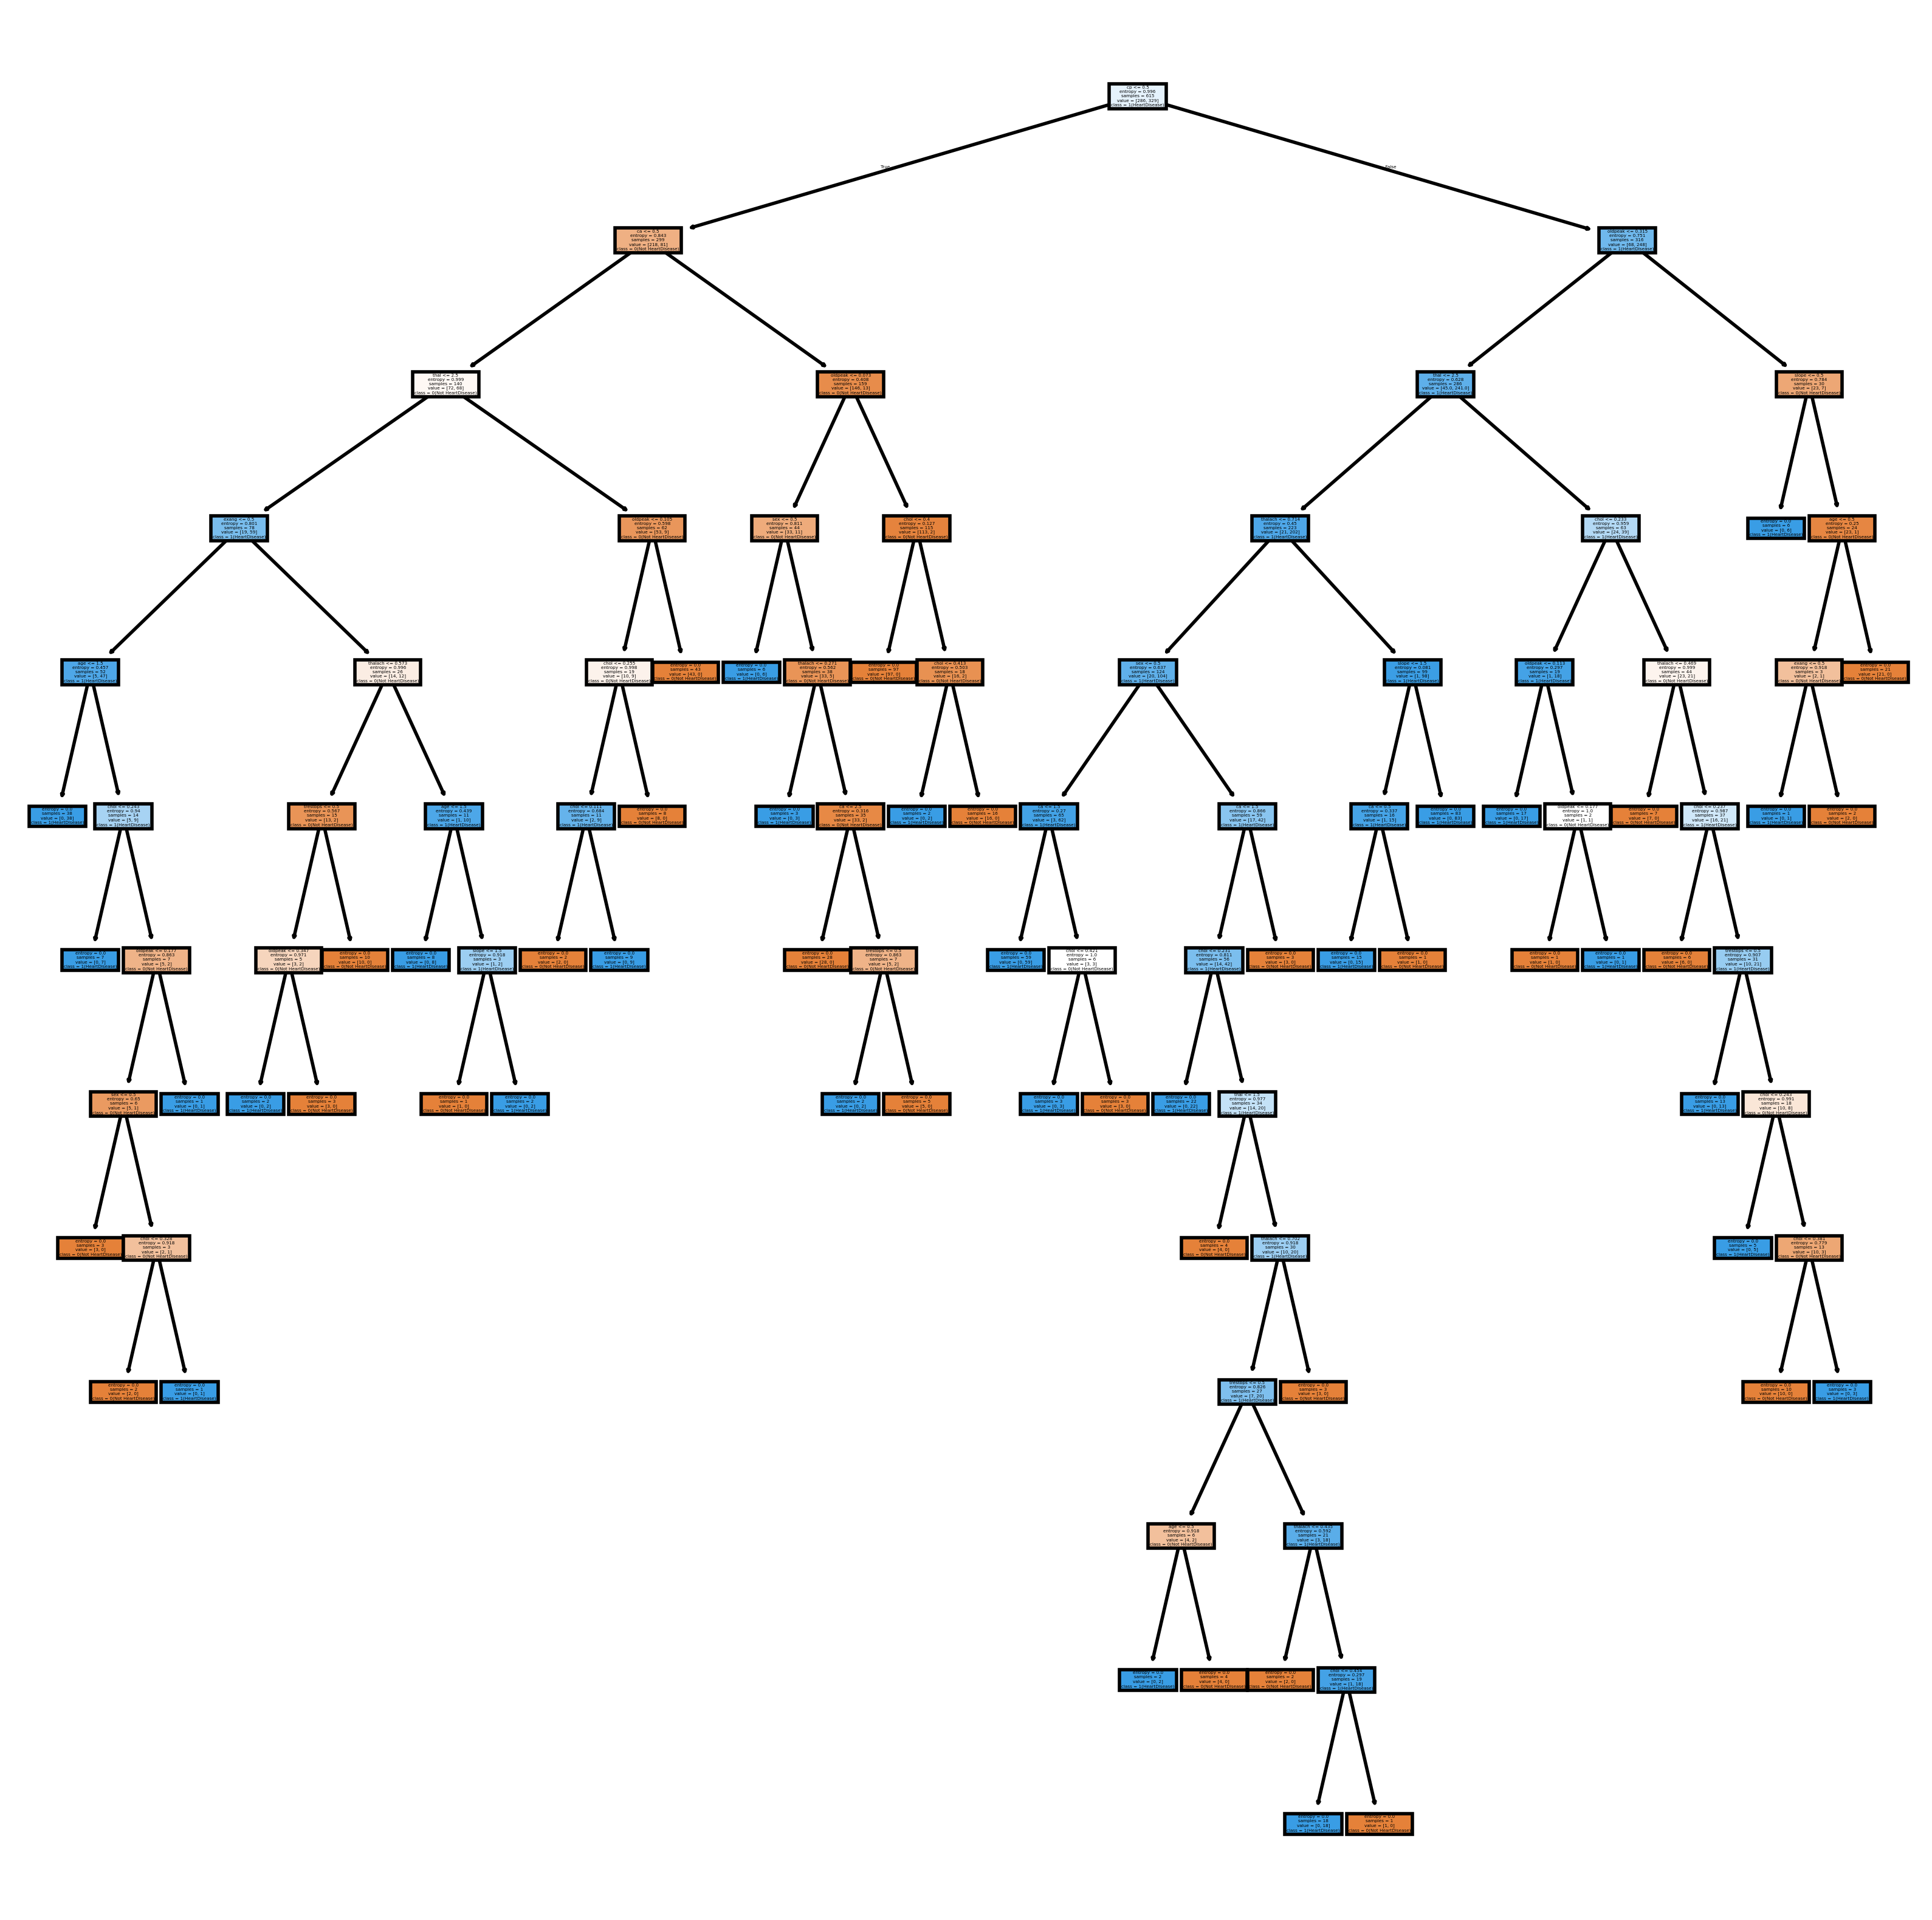

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

In [ ]:
fig.savefig("decision_tree2.png", dpi=400)

This decision tree displays a hierarchical classification process where nodes split based on selected attributes to optimize prediction accuracy. Each node represents a decision point that utilizes a feature from the dataset, chosen based on its ability to enhance separation between classes by reducing uncertainty (impurity).

-initial Split: The root node at the top represents the feature with the highest discriminative power. This feature is selected to best divide the dataset, maximizing information gain or minimizing impurity. The root feature might be one with significant predictive relevance for the classification goal.

-Intermediate Nodes: Moving down the tree, additional splits occur on other features that further partition the data into subsets, leading to more refined classifications. Each of these splits is determined based on thresholds or values that optimize predictive accuracy. Features such as age, cholesterol, or other pertinent factors could be represented here.

Branching Pathways: Each pathway from a parent node to a child node represents a decision based on the feature at that node, effectively creating a path that defines a unique set of conditions. Each branch represents a specific decision based on the feature and threshold split at each node, narrowing down the classification as we proceed.

Leaf Nodes: At the end of each branch, a leaf node provides a final prediction or classification based on the pathway conditions. These leaf nodes represent terminal points where the samples are classified into distinct categories (e.g., "Heart Disease" or "No Heart Disease"). Each pathway to a leaf node represents a unique combination of feature values, guiding the prediction for a specific class based on the model's learned patterns.

model evaluation and selection:

In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm2)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm2[1, 1]
TN = cm2[0, 0]
FP = cm2[0, 1]
FN = cm2[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[205   8]
 [  9 188]]
Accuracy: 0.9585365853658536
Error Rate: 0.04146341463414638
Sensitivity: 0.9543147208121827
Specificity: 0.9624413145539906
Precision: 0.9591836734693877


### **Performance Metrics**

- **Accuracy**: This metric measures the proportion of correct predictions among all predictions. Here, the model's accuracy is approximately **95.85%**, meaning it correctly classifies about **95.85%** of instances.
  
- **Error Rate**: This represents the proportion of incorrect predictions out of all predictions. The error rate for this model is around **4.146%**.

- **Sensitivity (Recall)**: This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately **95.43%**.

- **Specificity**: This measures the proportion of actual negative cases (no heart disease) that the model correctly identifies, which is around **96.24%**.

- **Precision**: This reflects the proportion of positive predictions that are actually correct. Here, the precision is about **95.91%**.



### **Outcomes**

- The model's **accuracy of 95.85%** demonstrates a high level of correct predictions overall.
- The **sensitivity (95.43%)** indicates that the model has a strong ability to identify cases of heart disease.
- **Specificity, at 96.24%**, reflects the model’s competence in correctly classifying negative cases (no heart disease).
- **Precision at 95.91%** highlights the accuracy of positive predictions, suggesting that most positive predictions made by the model are correct.

Splitting Data into 80% Training and 20% Test:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

Confusion matrix:

[[109   0]
 [  0  96]]
0(Not HeartDisease) 1(HeartDisease)


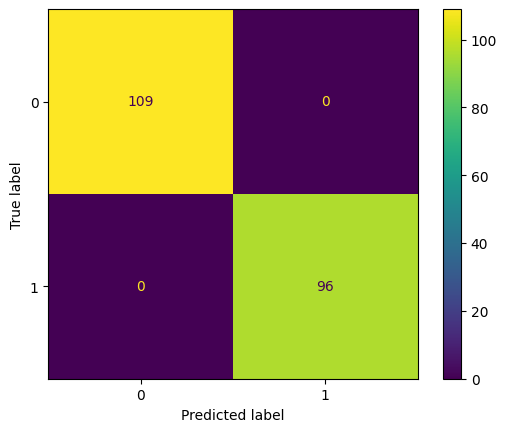

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay
cn3 = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3 , X_test , y_test , display_labels=cn3)

print('0(Not HeartDisease) 1(HeartDisease)')

**Top-Left (TP)** = 109: Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."

**Top-Right (FN)** = 0: Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."

**Bottom-Left (FP**) = 0: Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."

**Bottom-Right (TN)** = 96: Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight:
The model:
* Correctly identified 109 cases of "Not HeartDisease" and 96 cases of "HeartDisease."
* Made no mistakes, achieving a perfect classification with no false positives or false negatives.


Dessicion Tree:

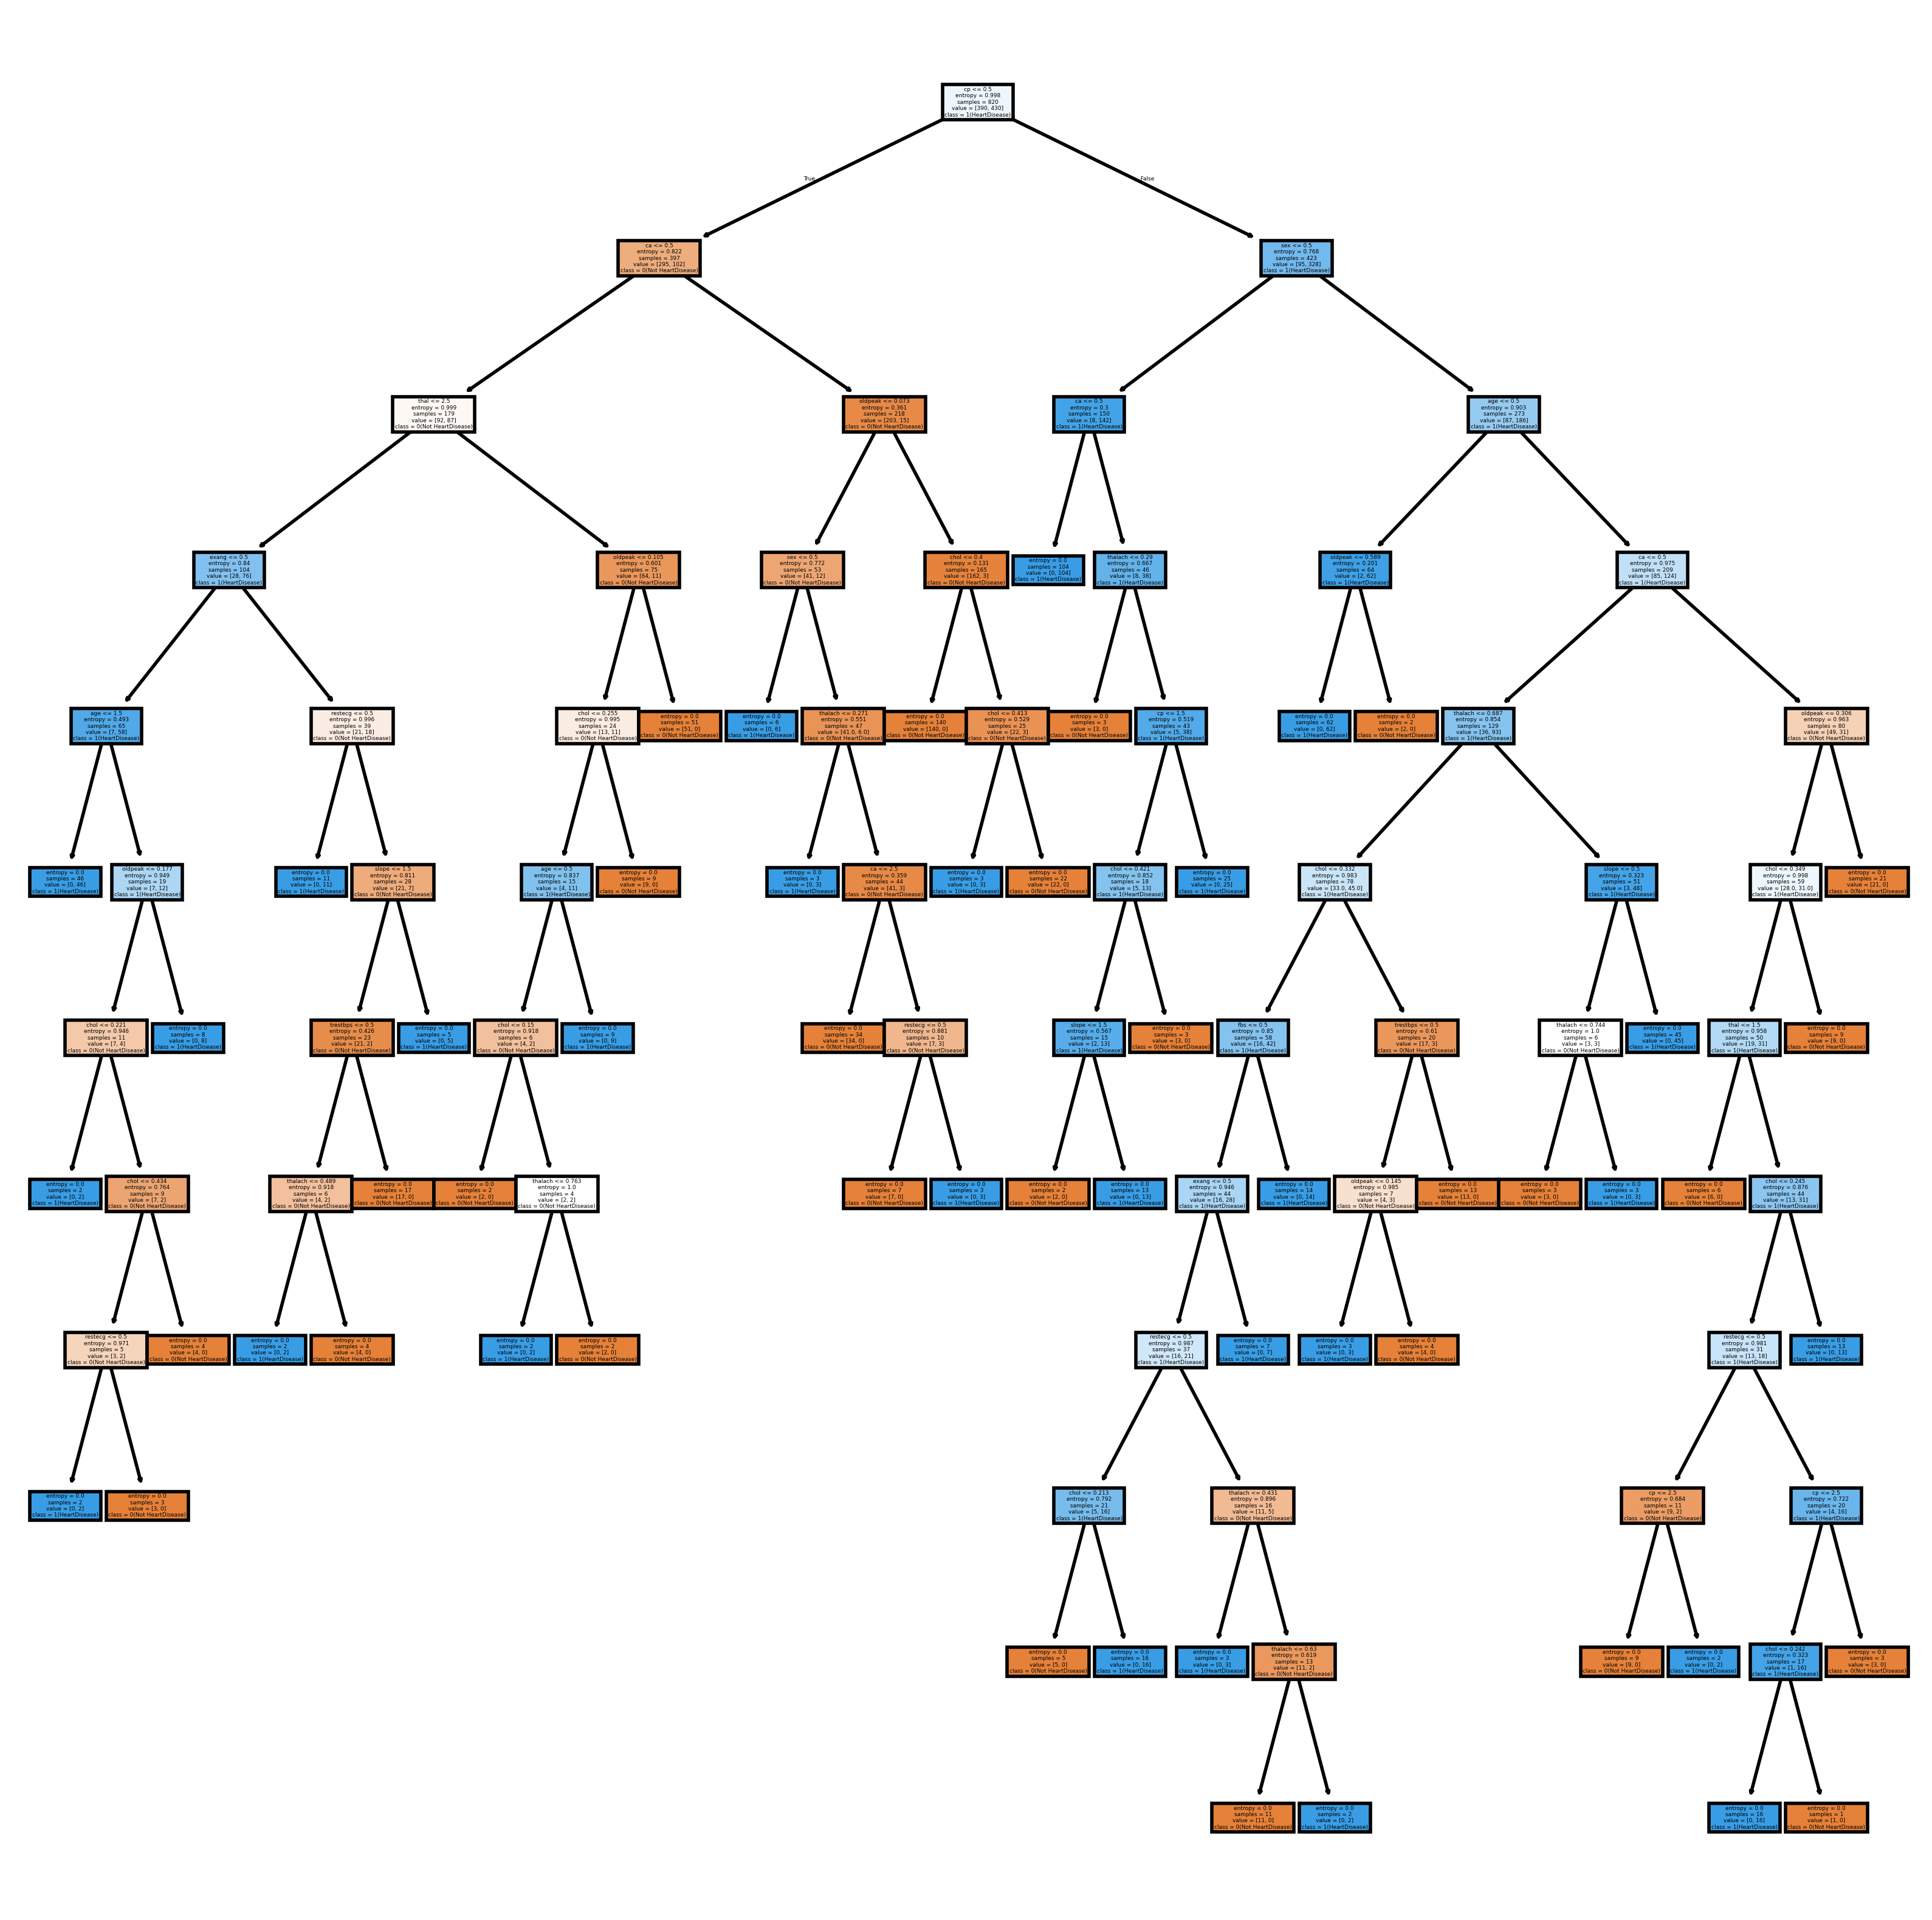

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

The decision tree visualizes a classification model to predict heart disease using various features.

**Initial Split:** The first node represents the feature most important for dividing the data, chosen to maximize information gain, often tied to key heart disease risk factors like age or cholesterol.

**Subsequent Nodes:**Further branches represent splits on additional features like resting heart rate and oldpeak, refining classification with each threshold to distinguish between heart disease and non-heart disease cases.

**Leaf Nodes:** The tree’s leaf nodes give final predictions—“Heart Disease” or “Not Heart Disease”—based on unique paths through specific feature combinations encountered along the way.

model evaluation and selection:

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[109   0]
 [  0  96]]
Accuracy: 1.0
Error Rate: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0


**Metrics Explanation:**
* Accuracy: This metric measures the proportion of correct predictions. The model achieved an accuracy of 100%, meaning it correctly classified all instances.
* Error Rate: The proportion of incorrect predictions. Since the model made no mistakes, the error rate is 0%.
* Sensitivity (Recall): This represents the proportion of actual positive cases (HeartDisease) that the model correctly identified. The model's sensitivity is 100%, meaning it correctly detected all positive cases.
* Specificity: This measures the proportion of actual negative cases (Not HeartDisease) that the model correctly classified. The model achieved 100% specificity, meaning no negative cases were misclassified.
* Precision: This reflects the proportion of positive predictions that were actually correct. The model's precision is 100%, indicating that every predicted positive case was truly positive.

**Outcomes:**
* The model’s 100% accuracy confirms flawless performance in classifying both heart disease and non-heart disease cases.
* Sensitivity and specificity of 100% indicate that the model never missed a case of heart disease and never falsely identified a healthy person as having heart disease.
* Perfect precision ensures that all positive predictions were indeed correct.


# **Evaluate the models of information gain**

**Summary of the Results**

In [14]:
d = {
        "Split": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
        ],
     "60% training, 40% testing	": [
        "0.9585", "0.04146", "0.9543", "0.9624",
        "0.9591 "

    ],
    "70% training, 30% testing": [
        "0.9772", "0.0227", "0.9795", "0.9751", "0.9729"
    ],

    "	80% training, 20% testing": [
        "1.0", "0.0", "1.0", "1.0","1.0"
    ]
}
g = pd.DataFrame(d)
g.style.set_properties(**{'text-align': 'center'})

,Split,"60% training, 40% testing","70% training, 30% testing","80% training, 20% testing"
0,Accuracy,0.9585,0.9772,1.0
1,Error Rate,0.04146,0.0227,0.0
2,Sensitivity,0.9543,0.9795,1.0
3,Specificity,0.9624,0.9751,1.0
4,Precision,0.9591,0.9729,1.0


Evaluation of Models

**Accuracy**:
* The accuracy improves from 95.85% (60%-40%) to 100% (80%-20%).
* The 80%-20% split achieves perfect accuracy, indicating that the model is classifying all test instances correctly.

**Error Rate:**
* The error rate decreases from 4.146% (60%-40%) to 0% (80%-20%).
* This means the model is making no incorrect predictions with the 80%-20% split.

**Sensitivity (Recall / True Positive Rate):**
* Sensitivity starts at 95.43% (60%-40%) and reaches 100% (80%-20%).
* This suggests that the model identifies all positive cases correctly in the 80%-20% split.

**Specificity (True Negative Rate):**
* Specificity improves from 96.24% (60%-40%) to 100% (80%-20%).
* This indicates that the model correctly classifies all negative cases when trained on 80% of the data.

**Precision:**
* Precision increases from 95.91% (60%-40%) to 100% (80%-20%).
* A precision of 1.0 (100%) means that every positive prediction made by the model is actually correct.

**Conclusion:**
* The 80%-20% model achieves perfect scores across all metrics (100%), meaning it correctly classifies every test instance.